In [55]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import math
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
phipi0_file =  '/media/jykim/T7/storage/Ntuples_ghi/D2phipi0/massvetov2_pre_D2phipi0_mdst_10000*.root'

In [3]:
phigamma_file = '/media/jykim/T7/storage/Ntuples_ghi/D2phigamma/massvetov2_pre_D2phigamma_mdst_10000*.root'

In [76]:
tree = 'phi'
variables = ['D0_M', 'Dstarp_delM', 'Dstarp_isSignal','D0_cosHel_0',\
            'dM_pi0_mask','dM_pi0','dM_pi0_50MeV','dM_pi0_75MeV',\
            'npi0_base','npi0_50MeV','npi0_75MeV','npi0_mask',\
            'true_npi0_base','true_npi0_50MeV','true_npi0_75MeV','true_npi0_mask',\
            'D0mother_npi0_base','D0mother_npi0_50MeV','D0mother_npi0_75MeV','D0mother_npi0_mask',\
            'Pis_pionID']
base_filter = 'D0_M>0'

In [77]:
phipi0_pd_df = get_pd(file=phipi0_file , tree=tree, variables=variables ,base_filter=base_filter)
phigamma_pd_df = get_pd(file=phigamma_file , tree=tree, variables=variables ,base_filter=base_filter)


runtime_error: string ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::GetColumnType(basic_string_view<char,char_traits<char> > column) =>
    runtime_error: Column "Pis_pionID" is not in a dataset and is not a custom column been defined.

In [33]:
phipi0_pd_df.describe()

,D0_M,Dstarp_delM,Dstarp_isSignal,D0_cosHel_0,dM_pi0_mask,dM_pi0,dM_pi0_50MeV,dM_pi0_75MeV,npi0_base,npi0_50MeV,npi0_75MeV,npi0_mask,true_npi0_base,true_npi0_50MeV,true_npi0_75MeV,true_npi0_mask,D0mother_npi0_base,D0mother_npi0_50MeV,D0mother_npi0_75MeV,D0mother_npi0_mask
count,691594.000000,691594.000000,672426.0,691594.000000,6.871650e+05,6.915910e+05,6.911230e+05,6.900420e+05,691591.000000,691123.000000,690042.000000,687165.000000,521745.000000,469985.000000,420703.000000,449889.000000,449889.000000,449889.000000,449889.000000,449889.000000
mean,1.786542,0.146358,0.0,-0.005494,6.563055e-02,1.047705e-02,3.975117e-02,6.439143e-02,15.525872,8.353257,6.998025,5.891722,1.003348,1.002877,1.002427,1.002221,0.889453,0.891778,0.822899,0.891235
std,0.074434,0.003039,0.0,0.761162,1.335093e-01,1.963126e-02,8.456351e-02,1.215498e-01,4.947740,3.457038,3.102884,2.923022,0.057768,0.053558,0.049204,0.047070,0.322020,0.318595,0.386782,0.317557
min,1.680000,0.035246,0.0,-1.000000,1.851923e-09,1.851923e-09,1.851923e-09,1.851923e-09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.730387,0.144778,0.0,-0.783122,3.281823e-03,2.049478e-03,3.079355e-03,3.454843e-03,12.000000,6.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.778150,0.145695,0.0,-0.088640,8.347959e-03,4.872407e-03,7.604574e-03,9.165326e-03,15.000000,8.000000,7.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.825169,0.147023,0.0,0.778109,5.013197e-02,1.039233e-02,2.862152e-02,6.484176e-02,19.000000,11.000000,9.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2.049997,0.323824,0.0,0.999997,9.994458e-01,9.795731e-01,9.995863e-01,9.995863e-01,46.000000,29.000000,26.000000,26.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


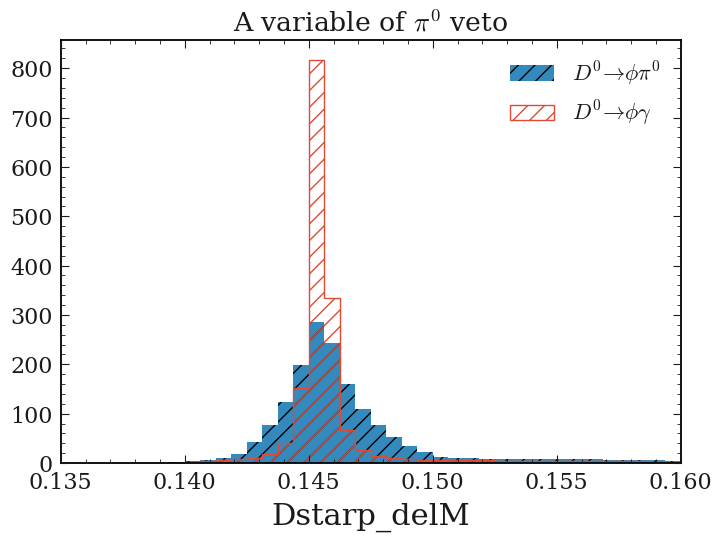

In [34]:
xrange = (0.135,0.160,41)
xm = np.linspace(*xrange)
var = 'Dstarp_delM'

plt.hist(phipi0_pd_df[var], label=r'$D^0\to\phi\pi^0$',bins=xm,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(phigamma_pd_df[var], label=r'$D^0\to\phi\gamma$',bins=xm,  histtype='step', density=True, hatch="//")

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = var
plot_title = r'A variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

In [69]:
cut_step0 = 'abs(D0_cosHel_0)<0.8 & dM_pi0_mask>0.022'
cut_step0 = 'abs(Dstarp_delM-0.1455)<0.0008 & dM_pi0_75MeV>0.022'


In [71]:
phipi0_pd_df_step1 = phipi0_pd_df.query(cut_step0)
phigamma_pd_df_step1 = phigamma_pd_df.query(cut_step0)

phipi0_pd_df_cut_eff_step1 = len(phipi0_pd_df_step1)/len(phipi0_pd_df) 
phigamma_pd_df_cut_eff_step1 = len(phigamma_pd_df_step1)/len(phigamma_pd_df) 
print(f'Vpi0 cut eff step 0: {phipi0_pd_df_cut_eff_step1}')
print(f'Vgamma cut eff step 0: {phigamma_pd_df_cut_eff_step1}')

Vpi0 cut eff step 0: 0.18331853659806188
Vgamma cut eff step 0: 0.705409104869784


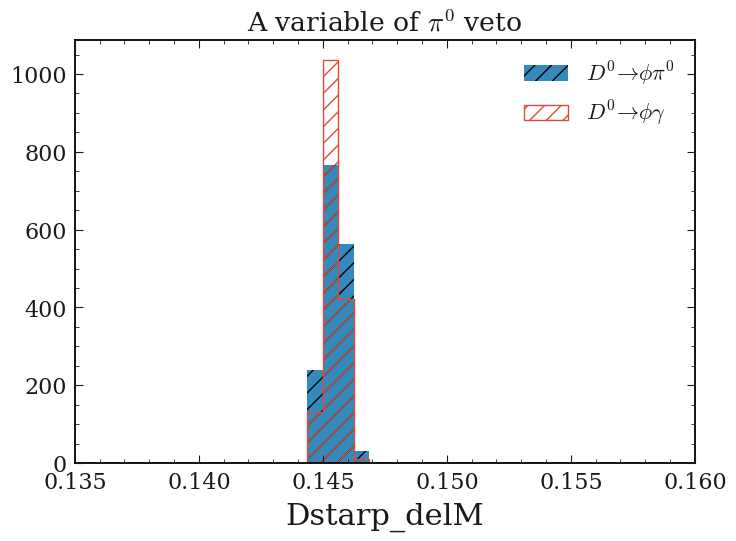

In [72]:
xrange = (0.135,0.160,41)
xm = np.linspace(*xrange)
var = 'Dstarp_delM'

plt.hist(phipi0_pd_df_step1[var], label=r'$D^0\to\phi\pi^0$',bins=xm,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(phigamma_pd_df_step1[var], label=r'$D^0\to\phi\gamma$',bins=xm,  histtype='step', density=True, hatch="//")

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = var
plot_title = r'A variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

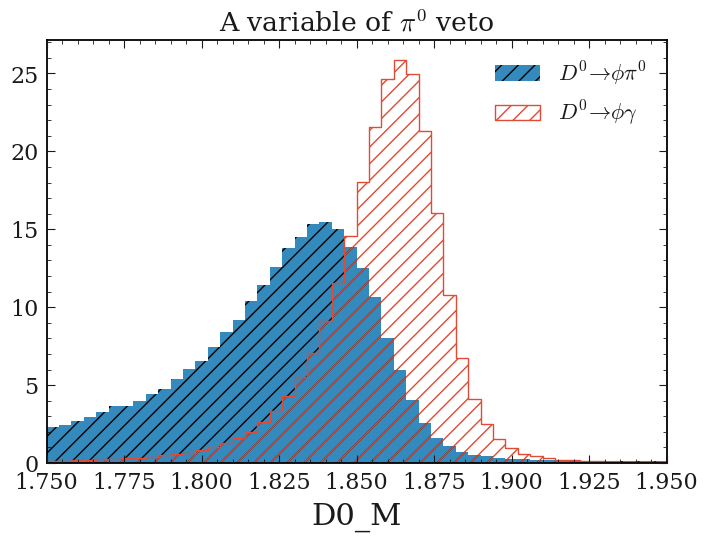

In [73]:
xrange = (1.75,1.95,51)
xm = np.linspace(*xrange)
var = 'D0_M'

plt.hist(phipi0_pd_df_step1[var], label=r'$D^0\to\phi\pi^0$',bins=xm,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(phigamma_pd_df_step1[var], label=r'$D^0\to\phi\gamma$',bins=xm,  histtype='step', density=True, hatch="//")

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = var
plot_title = r'A variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

<AxesSubplot:>

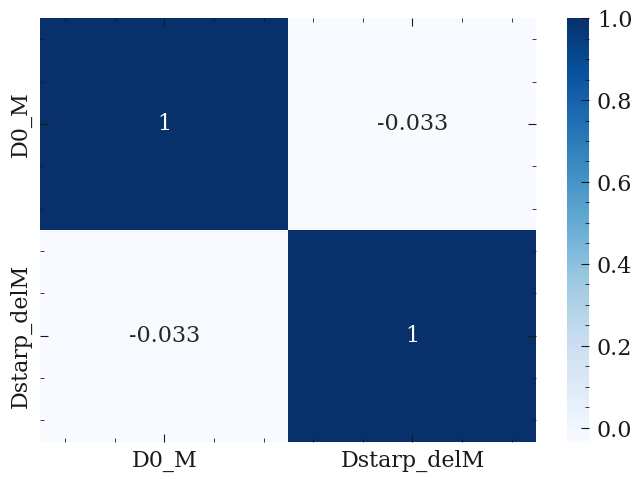

In [74]:
corr = phipi0_pd_df_step1[['D0_M', 'Dstarp_delM']].corr()
sb.heatmap(corr, cmap="Blues", annot=True)

<AxesSubplot:>

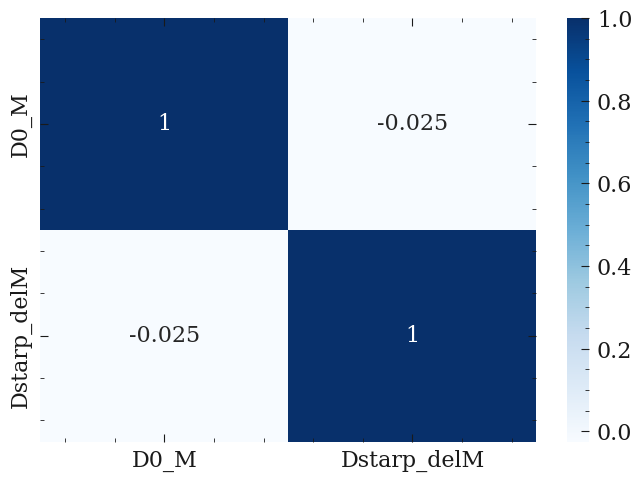

In [75]:
corr = phigamma_pd_df_step1[['D0_M', 'Dstarp_delM']].corr()
sb.heatmap(corr, cmap="Blues", annot=True)